# Predicting a country's defense budget given its population, area and some economical aspects

I am writing this project in order to get familiar with Python's main statistical and data science packages. 

I will first perform some basic exploration of the dataset and then run a multivariate linear model in order to predict how much each contry spends on defense, based on some of its economical and size indicators.

The data I used is available at:\
https://www.kaggle.com/prasertk/military-power-by-country-2022

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

plt.rcParams["figure.figsize"] = (10,4)

## Let's load our dataset and explore it a little bit

In [69]:
#Important: add the "keep_default_na" in order to not have North America (NA) read as NaN

data = pd.read_csv('global firepower 2022.csv', keep_default_na = False) 
data.head()

,Unnamed: 0,country,country_code,Active Personnel,Aircraft Carriers,Armored Vehicles,Attack Helicopters,Available Manpower,Coastline Coverage,Corvettes,...,Tanks,Total Aircraft Strength,Total Population,Towed Artillery,Trainers,Transports,Waterways (usable),Defense_Budget_mln,Total_Population_mln,Continent
0,0,Afghanistan,AFG,0,0,530,0,14611901,0,0,...,0,0,37466414,60,0,0,1200,99.05,37.466414,AS
1,1,Albania,ALB,8000,0,76,0,1513309,362,0,...,0,19,3088385,0,0,0,41,192.40,3.088385,EU
2,2,Algeria,ALG,130000,0,6461,45,20916812,998,6,...,2196,552,43576691,450,87,58,0,9700.00,43.576691,AF
3,3,Angola,ANG,107000,0,1210,15,6728529,1600,0,...,320,299,33642646,585,61,30,1300,1059.27,33.642646,AF
4,4,Argentina,ARG,83000,0,800,0,20180574,4989,9,...,349,218,45864941,172,70,22,11000,3064.80,45.864941,SA


In [70]:
print(f'Are there any NANs? {data.isna().any().any()}')
print(f'Number of countries: {len(data)}')

Are there any NANs? False
Number of countries: 140


In [71]:
data.columns

Index(['Unnamed: 0', 'country', 'country_code', 'Active Personnel',
       'Aircraft Carriers', 'Armored Vehicles', 'Attack Helicopters',
       'Available Manpower', 'Coastline Coverage', 'Corvettes',
       'Dedicated Attack', 'Defense Budget', 'Destroyers', 'External Debt',
       'Fighters/Interceptors', 'Fit-for-Service', 'Foreign Exchange/Gold',
       'Frigates', 'Helicopter Carriers', 'Helicopters', 'Labor Force',
       'Merchant Marine Fleet', 'Mine Warfare', 'Navy Ships',
       'Oil Consumption', 'Oil Production', 'Oil Proven Reserves',
       'Paramilitary', 'Patrol Vessels', 'Ports / Trade Terminals',
       'Purchasing Power Parity', 'Railway Coverage',
       'Reaching Mil Age Annually', 'Reserve Personnel', 'Roadway Coverage',
       'Rocket Projectors', 'Self-Propelled Artillery', 'Shared Borders',
       'Special-Mission', 'Square Land Area', 'Submarines', 'Tanker Fleet',
       'Tanks', 'Total Aircraft Strength', 'Total Population',
       'Towed Artillery', 'Traine

### Target value: defense budget of each country

<AxesSubplot:xlabel='Defense_budget_bln', ylabel='Count'>

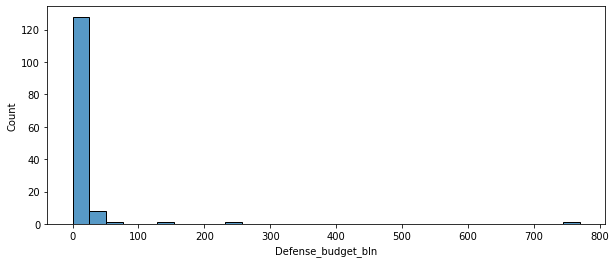

In [72]:
data['Defense_budget_bln'] = data['Defense Budget'] / 1000000000
sns.histplot(data = data, x = 'Defense_budget_bln', bins = 30)

An observation has a defense budget much higher than all the rest. Let's look at the top 5 countries for budget expense.

In [73]:
data.sort_values('Defense_budget_bln', ascending = False).head() 

,Unnamed: 0,country,country_code,Active Personnel,Aircraft Carriers,Armored Vehicles,Attack Helicopters,Available Manpower,Coastline Coverage,Corvettes,...,Total Aircraft Strength,Total Population,Towed Artillery,Trainers,Transports,Waterways (usable),Defense_Budget_mln,Total_Population_mln,Continent,Defense_budget_bln
132,132,United States,USA,1390000,11,45193,910,147399295,19924,22,...,13247,334998398,1339,2661,982,41009,770000.0,334.998398,NA,770.00
26,26,China,CHN,2000000,2,35000,281,754864769,14500,70,...,3285,1397897720,1734,399,286,110000,250240.0,1397.897720,AS,250.24
103,103,Russia,RUS,850000,1,30122,544,69737187,37653,86,...,4173,142320790,7571,522,445,102000,154000.0,142.320790,EU,154.00
131,131,United Kingdom,UKD,194000,2,5015,24,30857260,12429,0,...,693,67081000,126,247,40,3200,68000.0,67.081000,EU,68.00
44,44,Germany,GER,184000,0,9217,55,36755601,2389,5,...,617,79903481,0,37,43,7467,50300.0,79.903481,EU,50.30


For visualization purposes, let's just remove the US, China and Russia and treat them as outliers. We can do so either with isin() or with a simple '<' operator on the defense budget column.

<AxesSubplot:xlabel='Defense_budget_bln', ylabel='Count'>

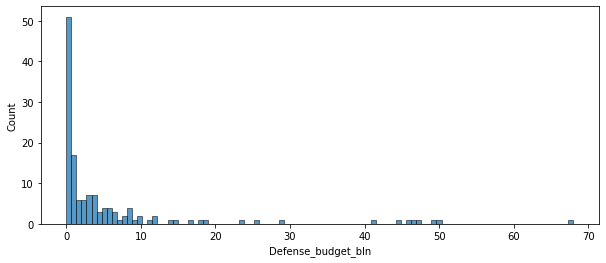

In [74]:
sns.histplot(data = data.loc[data['Defense_budget_bln'] < 100],
             x = 'Defense_budget_bln', bins = 100)

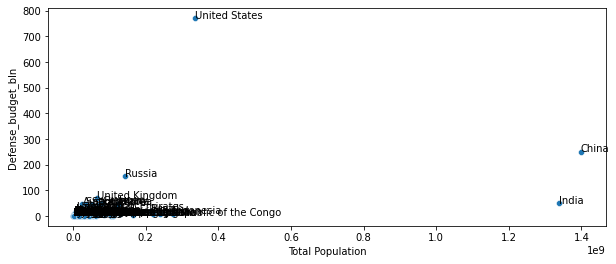

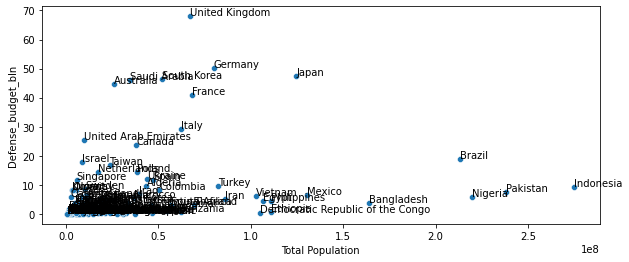

In [75]:
sns.scatterplot(data = data, x = 'Total Population', y = 'Defense_budget_bln')
for i in range(data.shape[0]):
    plt.text(x=data.loc[i,'Total Population']+0.3,y=data.loc[i,'Defense_budget_bln']+0.3,s=data.country[i])
plt.show()

#Let's remove US, China, India ad Russia for better visualization! 

list_to_remove = ['United States', 'China', 'Russia', 'India']
data_for_plot = data.loc[~data['country'].isin(list_to_remove)]
data_for_plot.reset_index(inplace=True)
sns.scatterplot(data = data_for_plot, 
                x = 'Total Population', y = 'Defense_budget_bln')

for i in range(data_for_plot.shape[0]):
    plt.text(x=data_for_plot.loc[i,'Total Population']+0.3,
             y=data_for_plot.loc[i,'Defense_budget_bln']+0.3,s=data_for_plot.country[i])

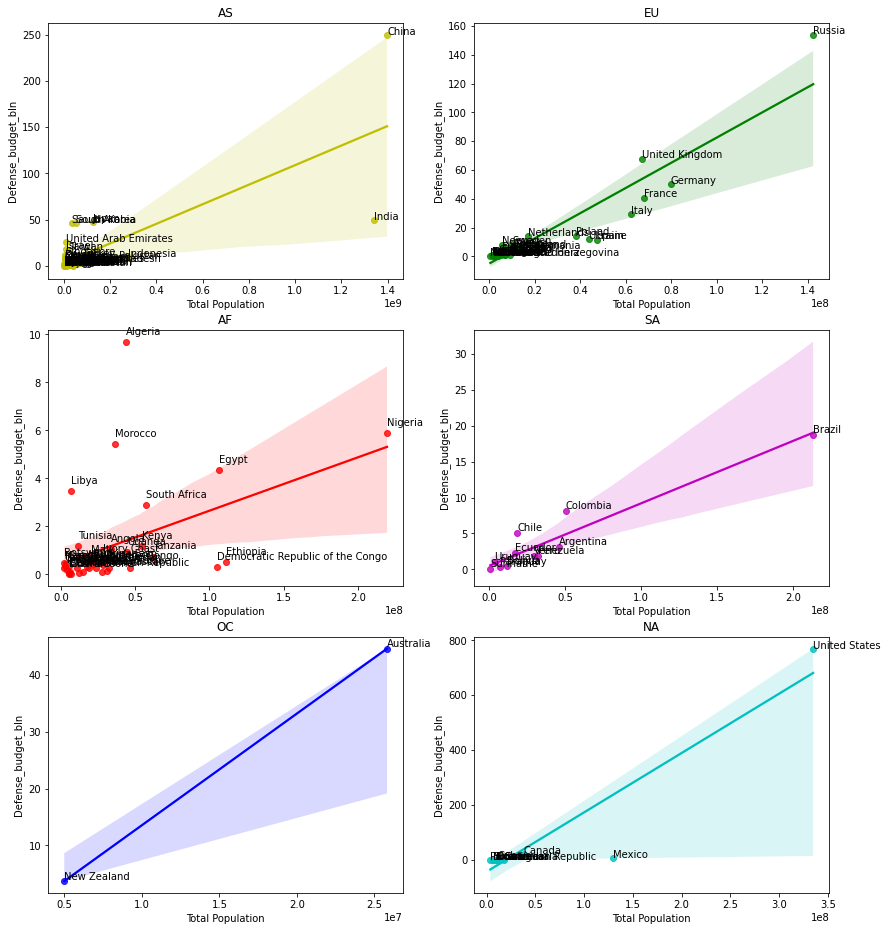

In [76]:
fig, axs = plt.subplots(3,2, figsize = (14,16))

axs = axs.ravel()
colors = 'ygrmbc'

for ind,cont in np.ndenumerate(data['Continent'].unique()):
    data_cont = data.loc[data['Continent'] == cont]
    data_cont.reset_index(inplace=True)
    
    sns.regplot(data = data_cont, x = 'Total Population', y = 'Defense_budget_bln', ax = axs[ind], color=colors[ind[0]])
    axs[ind].set_title(cont)
    
    for i in range(len(data_cont)):
        axs[ind].text(x=data_cont.loc[i,'Total Population']+0.3,
                 y=data_cont.loc[i,'Defense_budget_bln']+0.3,
                 s=data_cont.country[i])
    
plt.show()

In order to explain the total defense budget, we will use a multiple linear regression from the scikit-learn package.

We will first explore a base model, only using non-military covariates.

In [77]:
colX = ['External Debt', 'Foreign Exchange/Gold',
        'Oil Consumption', 'Oil Production', 
        'Oil Proven Reserves','Square Land Area', 'Total Population']

index = data['country']
y = data['Defense_budget_bln']
X = data[colX]

<AxesSubplot:>

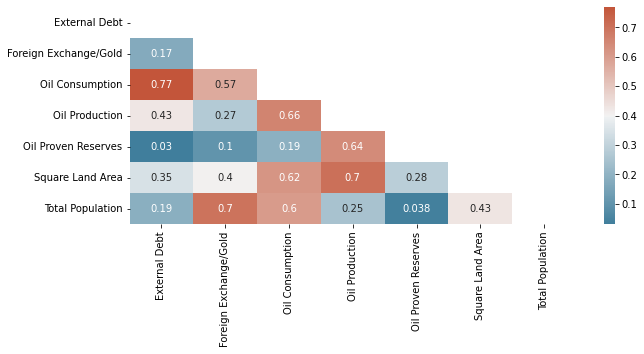

In [78]:
#Check for correlation between variables (from seaborn documentation)
mask = np.triu(np.ones_like(X.corr(), dtype=bool))
sns.heatmap(X.corr(), mask = mask, annot = True, cmap = sns.diverging_palette(230, 20, as_cmap=True))

#We might need some adjustments due to high correlation between certain variables

<AxesSubplot:>

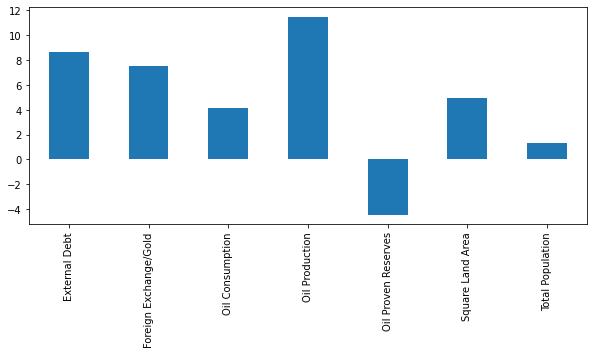

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

X_sd = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test, index_train, index_test = train_test_split(
    X_sd, y, index, test_size = .2, random_state = 42)

reg = LinearRegression().fit(X_train, y_train)

coefs = pd.Series(reg.coef_, index = colX)
coefs.plot.bar()

In [80]:
from sklearn.metrics import r2_score 

y_pred = reg.predict(X_test)

results = pd.DataFrame({
    'y_true' : y_test,
    'y_pred' : y_pred, 
    'error' : y_test - y_pred
})

report_df = pd.Series({'mse' : (results['error']**2) . mean(),
                      'mae' : results['error'].abs().mean(),
                      'r2' : r2_score(y_test, y_pred)})
report_df

mse    11104.420654
mae       27.021548
r2         0.490913
dtype: float64

### Let's see if we can select a better covariate subset with forward selection 

Selected columns: Index(['External Debt', 'Foreign Exchange/Gold', 'Oil Consumption',
       'Oil Proven Reserves', 'Total Population'],
      dtype='object')


<AxesSubplot:>

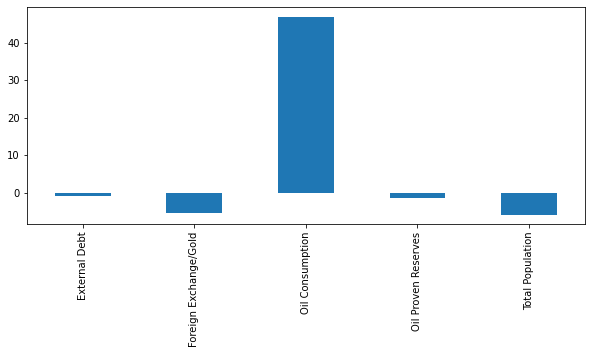

In [101]:
from sklearn.feature_selection import SequentialFeatureSelector

reg = LinearRegression()

sfs = SequentialFeatureSelector(reg, n_features_to_select=5)
sfs.fit(X_train, y_train)

print(f'Selected columns: {X.columns[sfs.get_support()]}')
reg.fit(X_train[:,sfs.get_support()], y_train)

coefs = pd.Series(reg.coef_, index = X.columns[sfs.get_support()])
coefs.plot.bar()

In [102]:
y_pred = reg.predict(X_test[:,sfs.get_support()])

results = pd.DataFrame({
    'y_true' : y_test,
    'y_pred' : y_pred, 
    'error' : y_test - y_pred
})

report_df = pd.Series({'mse' : (results['error']**2) . mean(),
                      'mae' : results['error'].abs().mean(),
                      'r2' : r2_score(y_test, y_pred)})
report_df

mse    4576.678936
mae      19.366252
r2        0.790180
dtype: float64

## Conclusions 

We were able to explain a good portion of our test set's defense budgets by using a multivariate linear model. In our case, a simple algorithm for variable selection provided much better results than simply using as much covariates as we had in our hands.